In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pylab as pl
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
mpl.rcParams['figure.dpi']=300

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 16,
    "font.family": "serif",
    "font.serif": 'cm10',
    'savefig.bbox' : 'tight'})

from utils.array import array_pattern,get_lobes_positions

/var/folders/cw/5xff940s6559c90nyhzx9s9m0000gn/T/ipykernel_50859/589914614.py:6: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


In [2]:
#Assume a linear array with M = 24 elements with unity weight. 
#Let the elements be uniformly spaced and try four different element spacings: d = λ/4, λ/2, λ, and 2λ. 
#Plot the results and discuss the differences as the inter-element distance varies.

# Number of elements
M=24
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/4
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)/M
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Array pattern for d = λ/4, λ/2, λ, and 2λ.
pattern_1 = np.abs(array_pattern(positions,weights,k_values))
pattern_1 = 20*np.log10(pattern_1/np.max(pattern_1))

pattern_2 = np.abs(array_pattern(positions*2,weights,k_values))
pattern_2 = 20*np.log10(pattern_2/np.max(pattern_2))

pattern_3 = np.abs(array_pattern(positions*4,weights,k_values))
pattern_3 = 20*np.log10(pattern_3/np.max(pattern_3))

pattern_4 = np.abs(array_pattern(positions*8,weights,k_values))
pattern_4 = 20*np.log10(pattern_4/np.max(pattern_4))

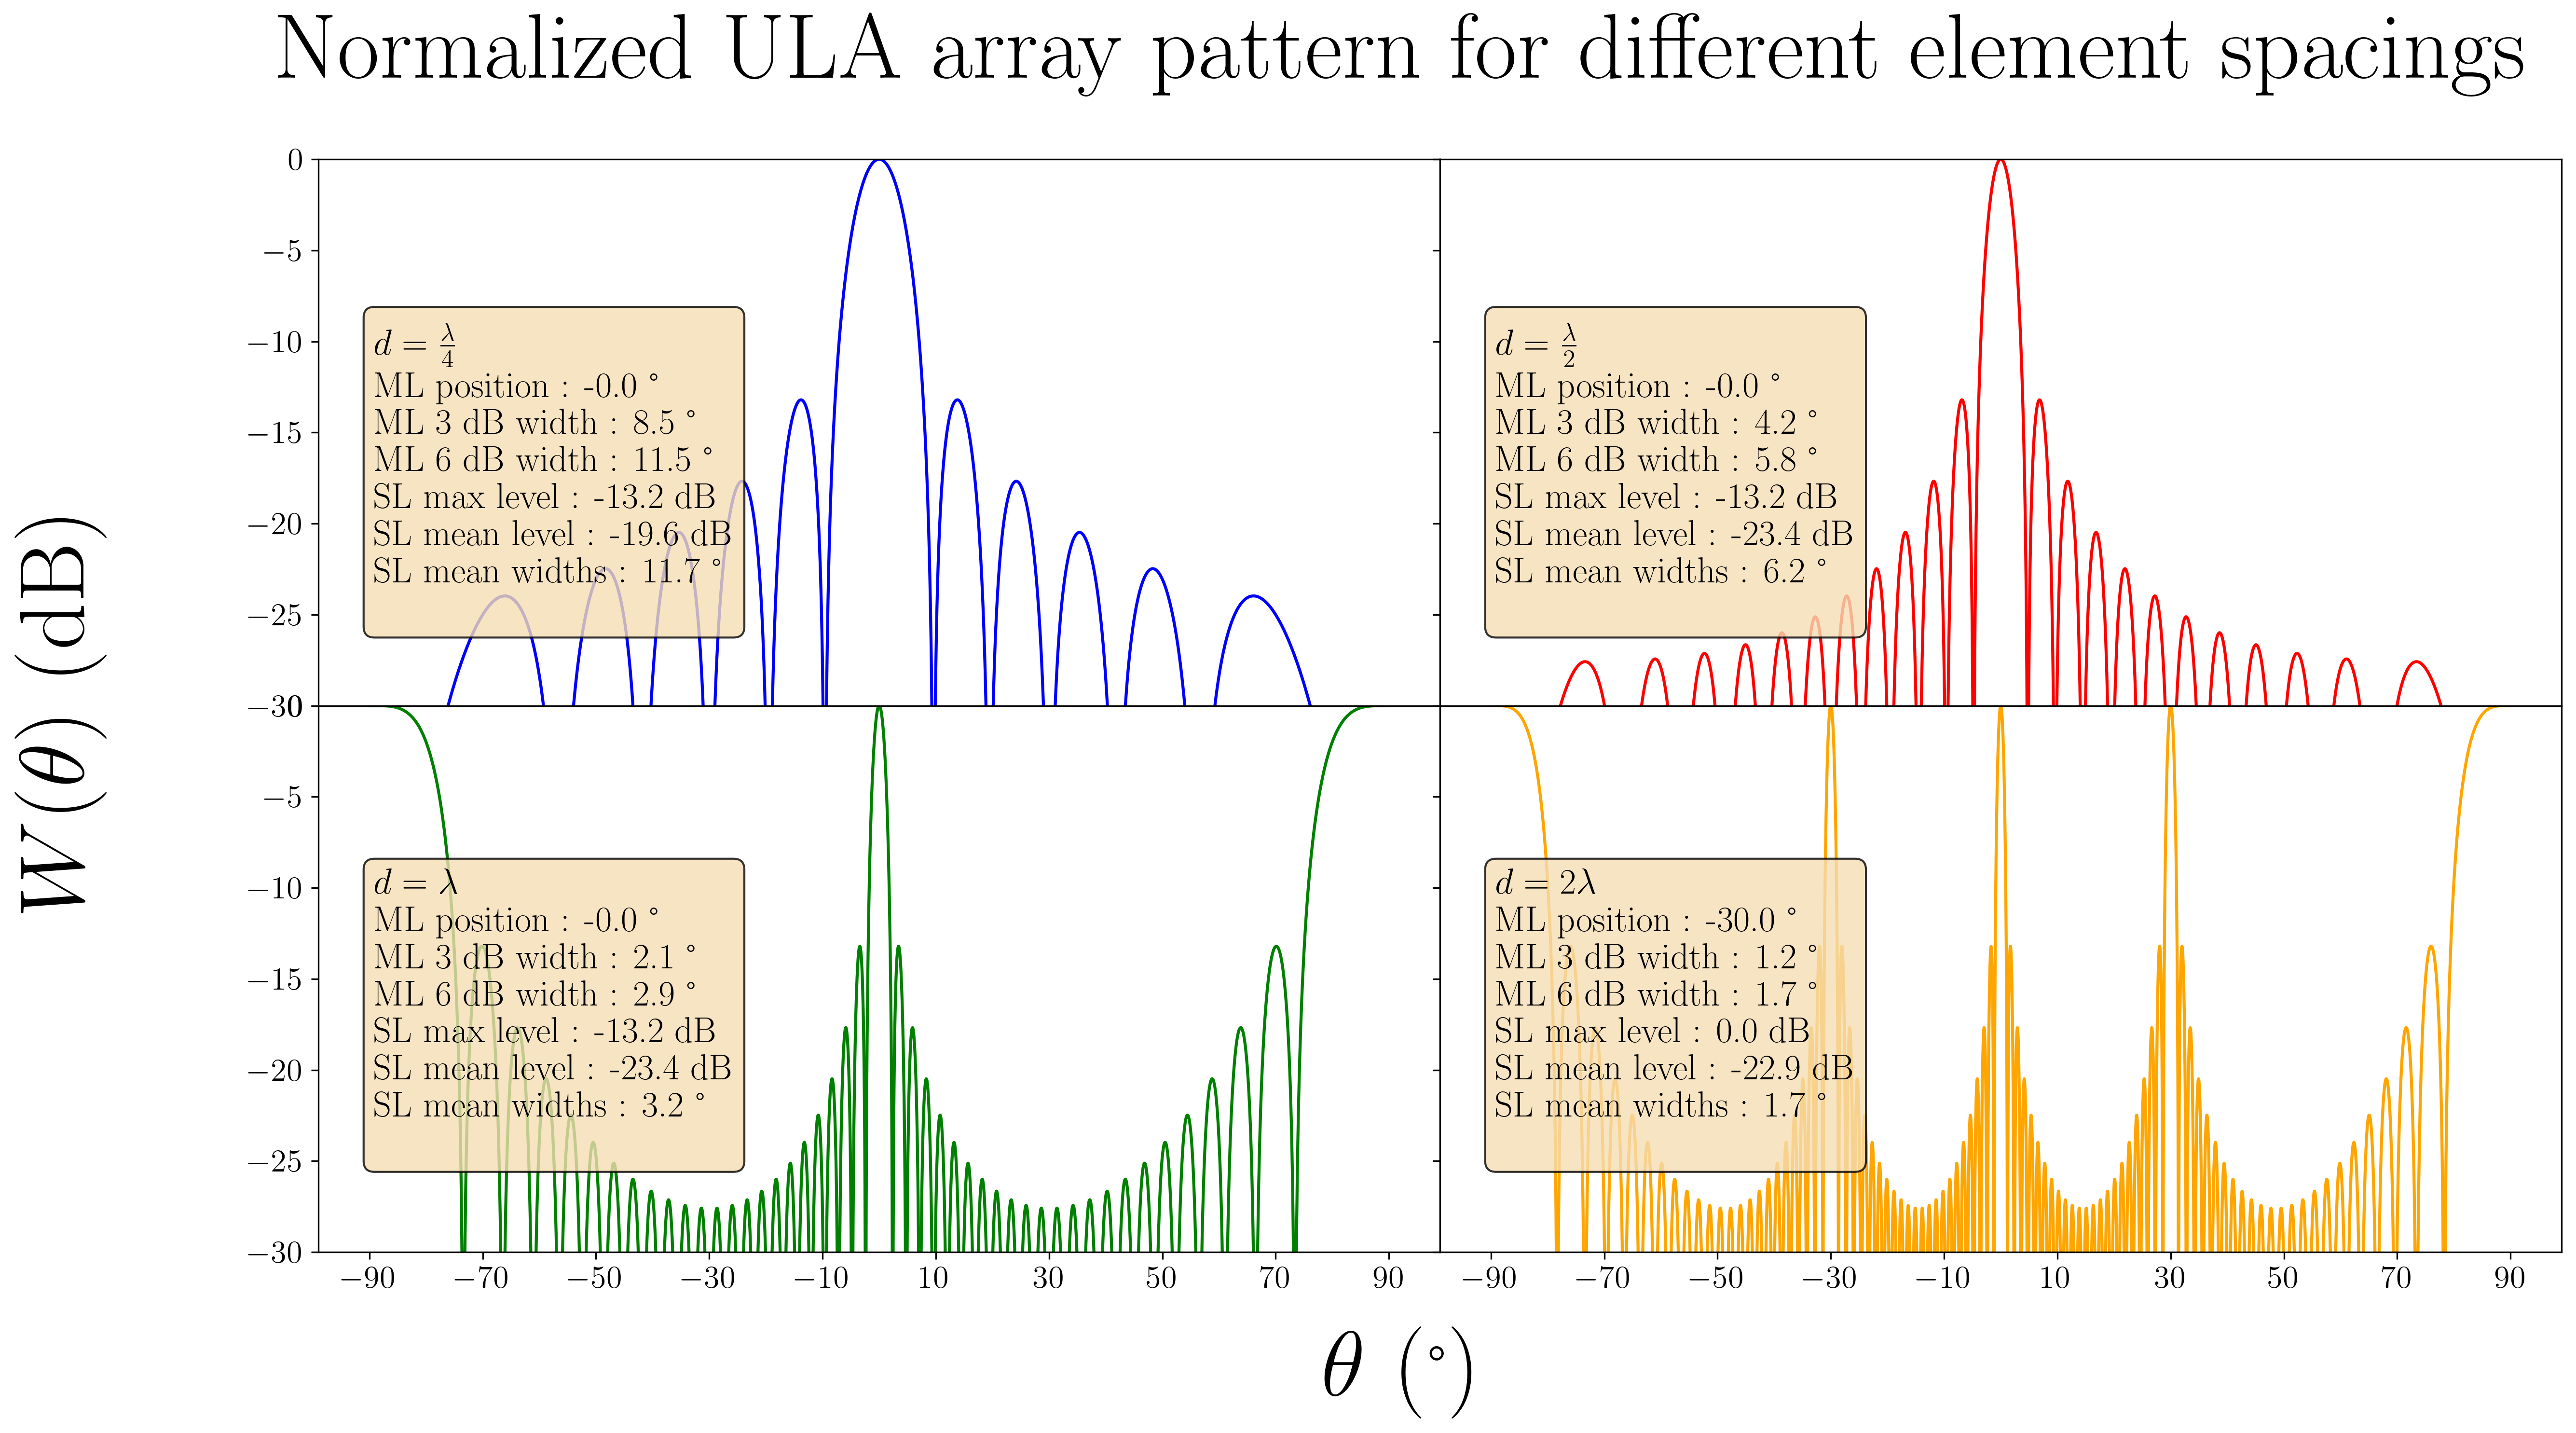

In [3]:
colors = ['blue','red','green','orange']
labels = ['$d=\\frac{\lambda}{4}$','$d=\\frac{\lambda}{2}$','$d=\lambda$','$d=2\lambda$']

patterns=[pattern_1,pattern_2,pattern_3,pattern_4]

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2,sharex=True,sharey=True,figsize=(20,10))

for i in range(4) :
    
    params = get_lobes_positions(patterns[i],np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ax = axs.flat[i]
    
    ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns[i],color=colors[i],label=labels[i])
    
    ax.set_xticks(np.arange(-90,110,20))
    textstr = ''' {}
    ML position : {:.1f} °
    ML 3 dB width : {:.1f} °
    ML 6 dB width : {:.1f} °
    SL max level : {:.1f} dB
    SL mean level : {:.1f} dB 
    SL mean widths : {:.1f} °
    '''.format(labels[i],params['ML position'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])
    
    
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
    
    ax.set_ylim([-30,0])
    


fig.supxlabel('$\\theta$ (°)',fontsize=46)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=46)
fig.suptitle('Normalized ULA array pattern for different element spacings',fontsize=46)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('images/array/ula_patterns_deg.png',dpi=300)

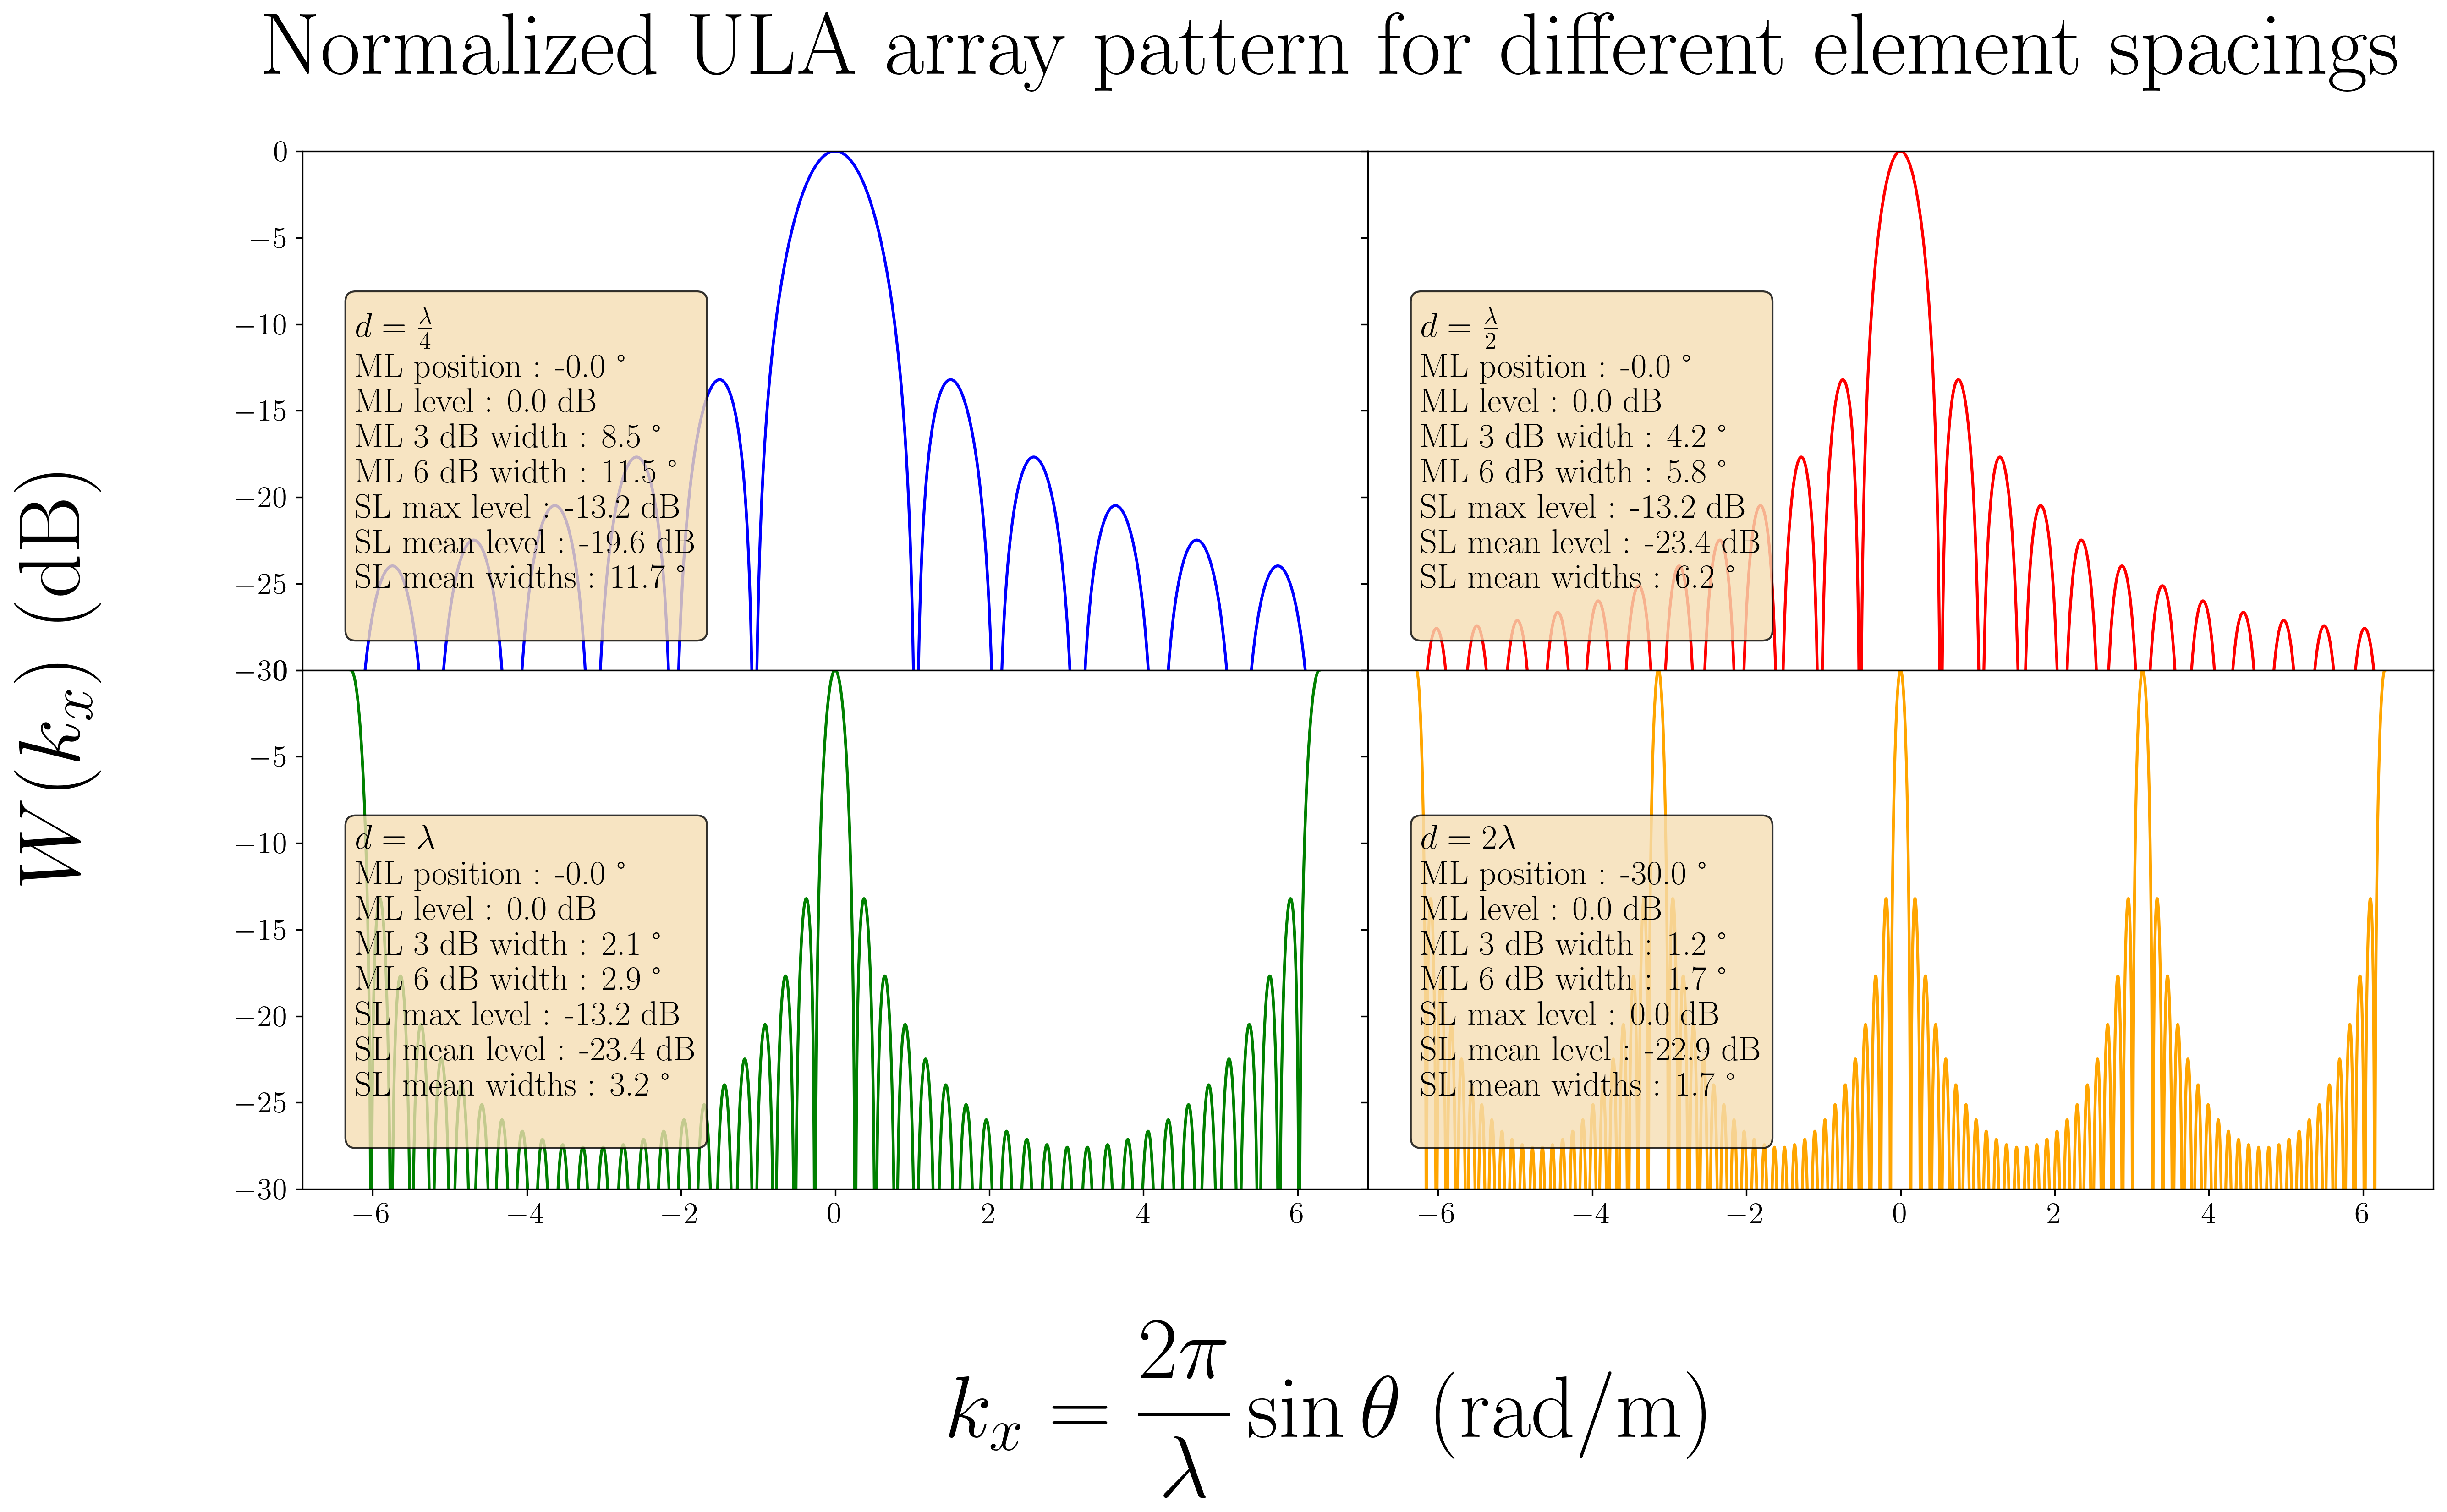

In [4]:
colors = ['blue','red','green','orange']
labels = ['$d=\\frac{\lambda}{4}$','$d=\\frac{\lambda}{2}$','$d=\lambda$','$d=2\lambda$']

patterns=[pattern_1,pattern_2,pattern_3,pattern_4]

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2,sharex=True,sharey=True,figsize=(20,10))

for i in range(4) :
    
    params = get_lobes_positions(patterns[i],np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ax = axs.flat[i]
    
    ax.plot(k_values,patterns[i],color=colors[i],label=labels[i])
    
    #ax.set_xticks(np.arange(-90,110,20))
    textstr = ''' {}
    ML position : {:.1f} °
    ML level : {:.1f} dB
    ML 3 dB width : {:.1f} °
    ML 6 dB width : {:.1f} °
    SL max level : {:.1f} dB
    SL mean level : {:.1f} dB 
    SL mean widths : {:.1f} °
    '''.format(labels[i],params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])
    
    
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
    
    ax.set_ylim([-30,0])
    


fig.supxlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)',fontsize=46,y=-0.1)
fig.supylabel('$W(k_x)$ (dB)',fontsize=46)
fig.suptitle('Normalized ULA array pattern for different element spacings',fontsize=46)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('images/array/ula_patterns_k.png',dpi=300)

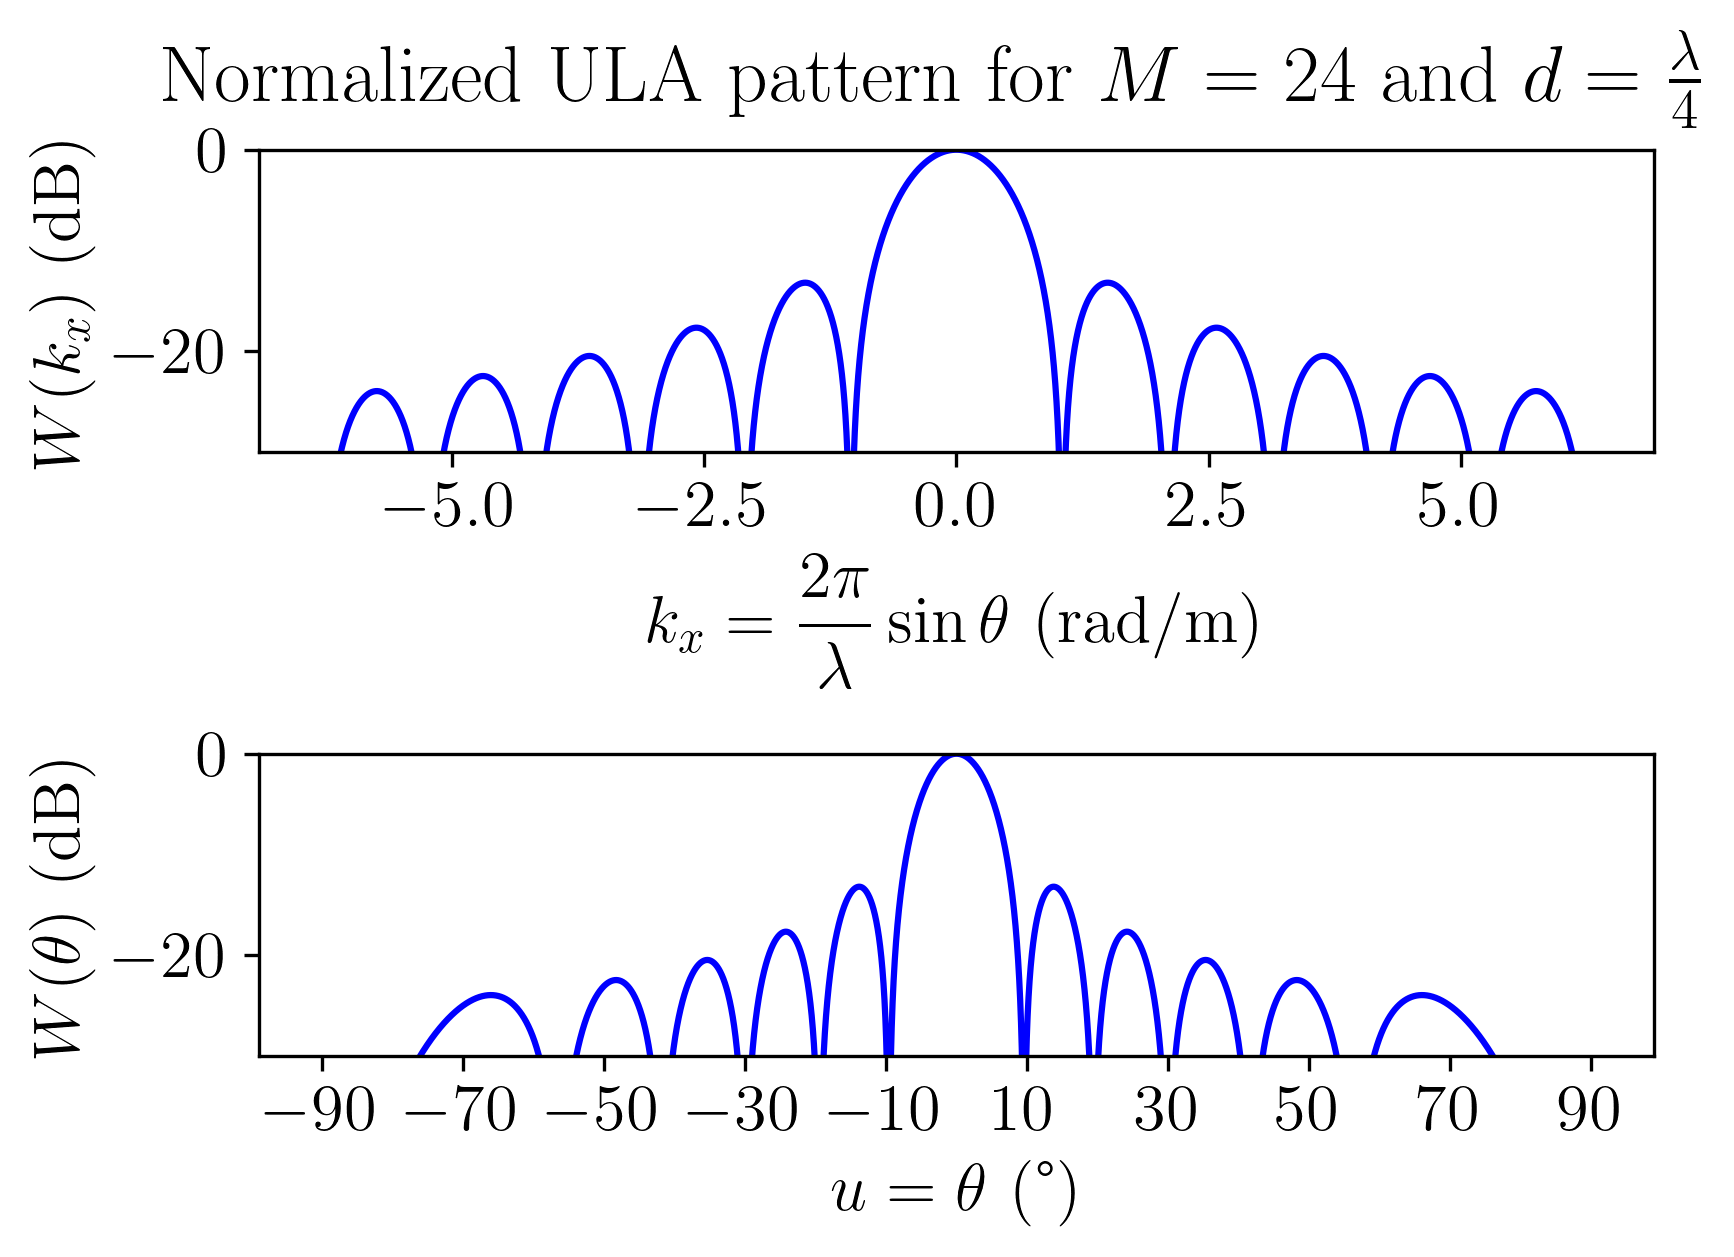

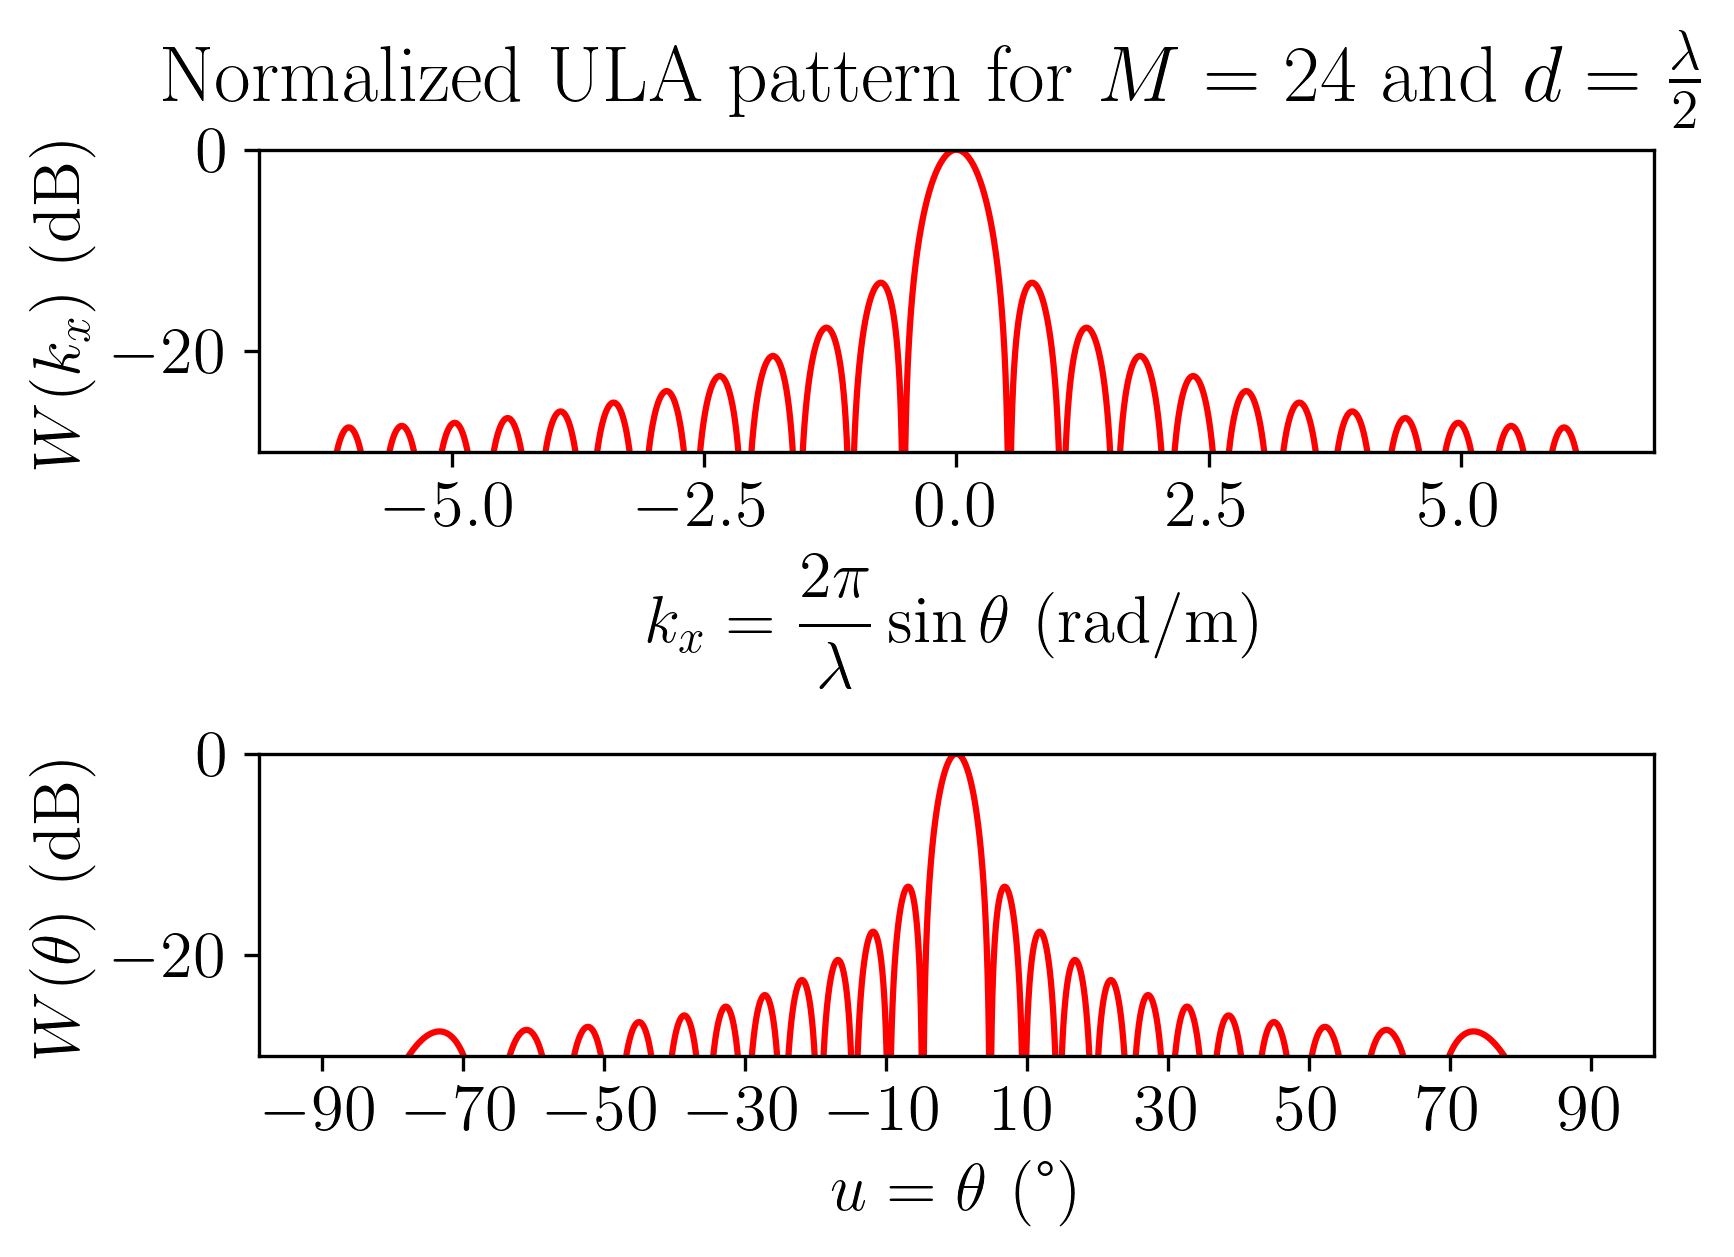

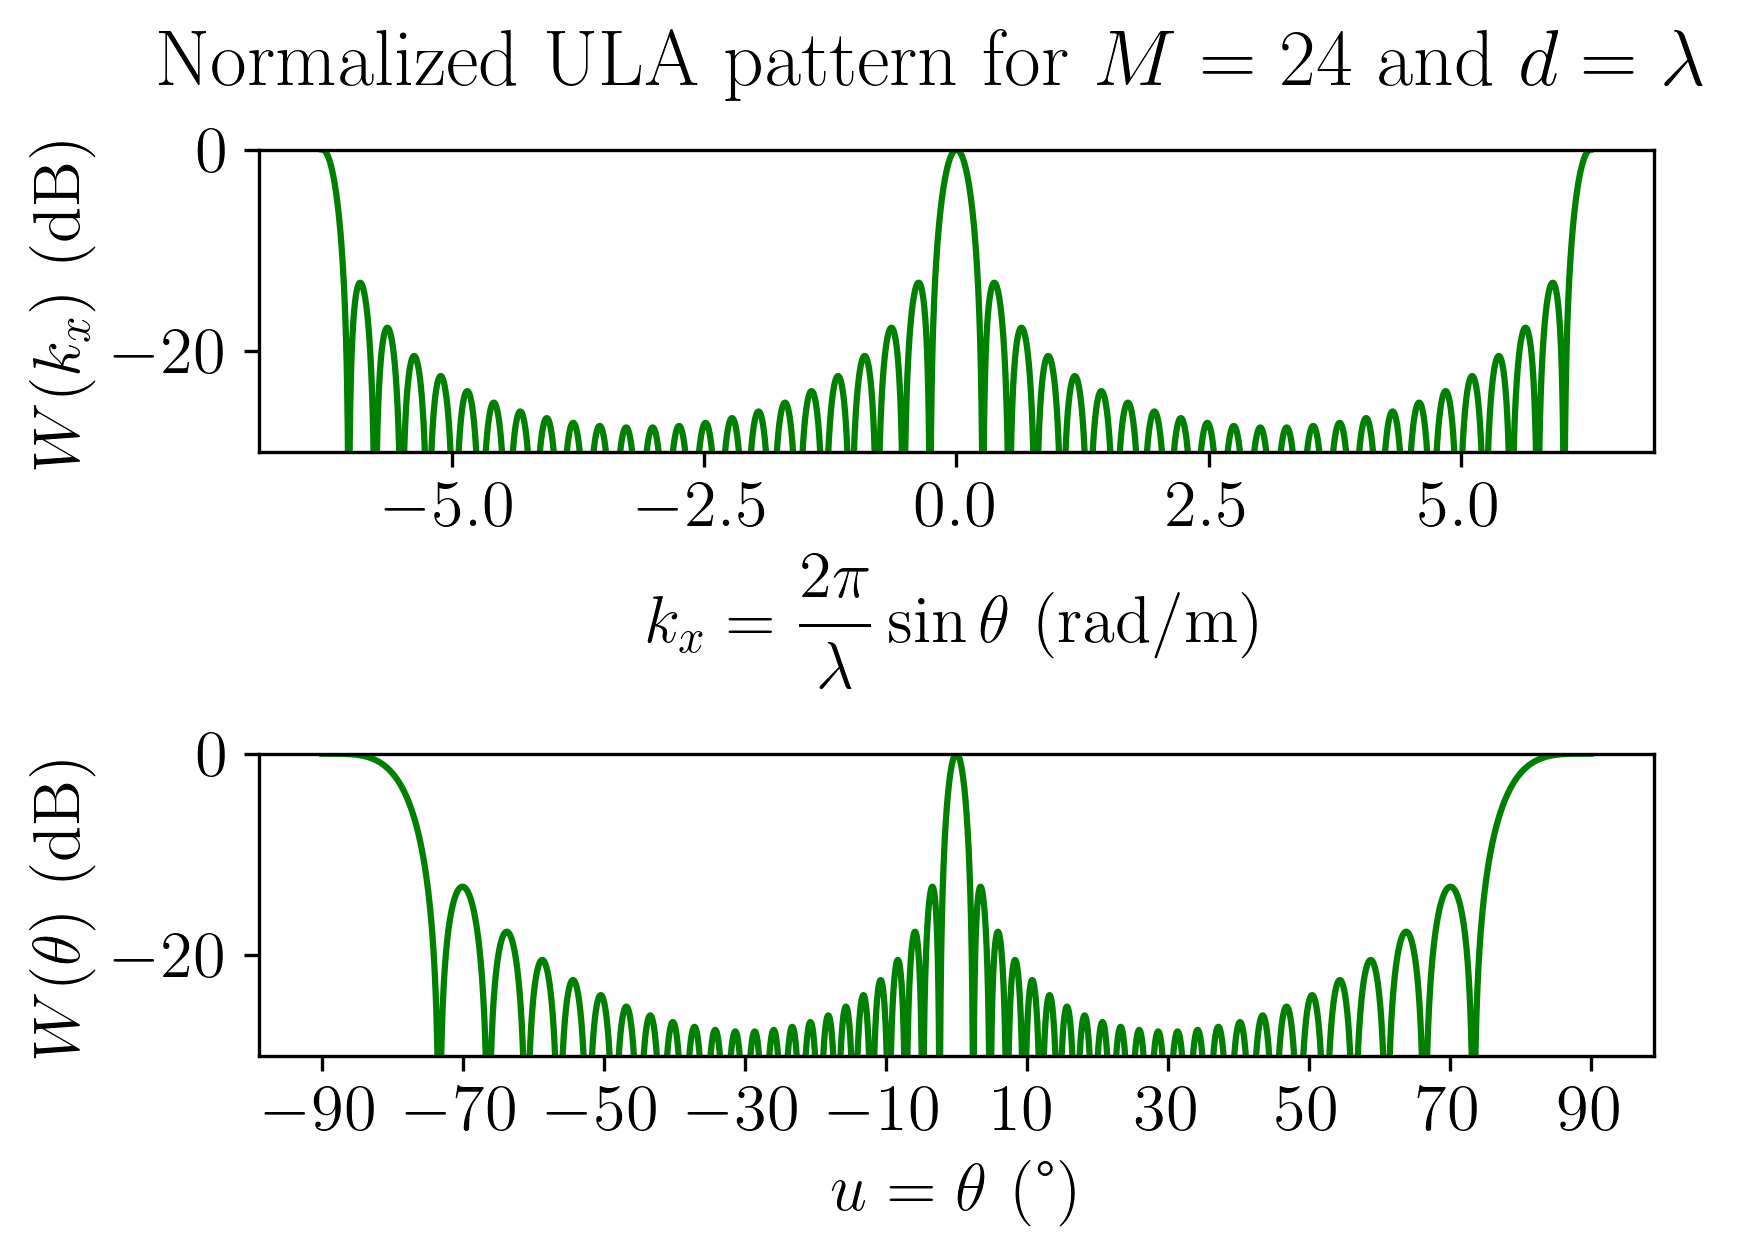

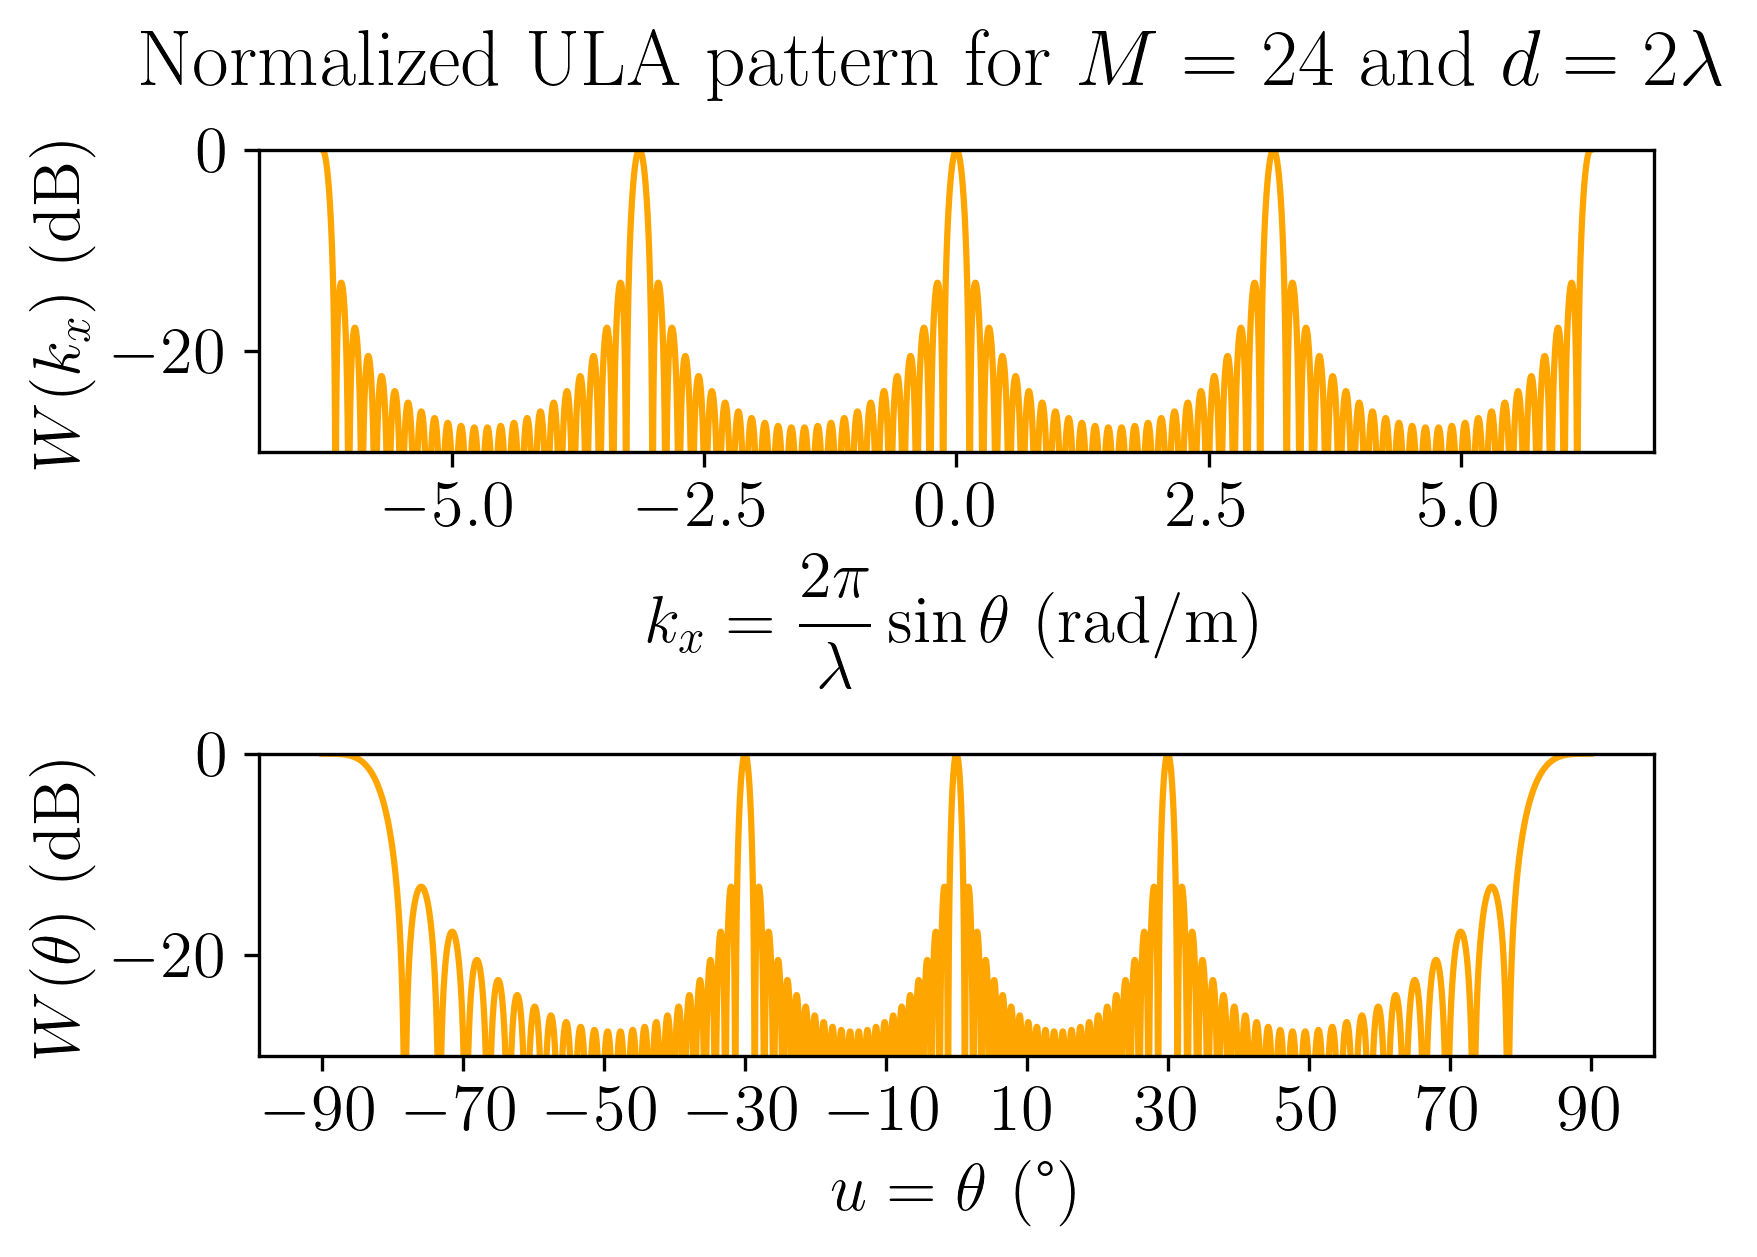

In [5]:
colors = ['blue','red','green','orange']
labels = ['$d=\\frac{\lambda}{4}$','$d=\\frac{\lambda}{2}$','$d=\lambda$','$d=2\lambda$']

patterns=[pattern_1,pattern_2,pattern_3,pattern_4]

for i in range(4):
    fig, ax = plt.subplots(2)
    ax1,ax2 = ax.flat

    fig.suptitle('Normalized ULA pattern for $M=24$ and {}'.format(labels[i]))
    ax1.plot(k_values,patterns[i],color=colors[i])

    ax1.set_xlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)')
    ax1.set_ylabel('$W(k_x)$ (dB)')
    
    ax1.set_ylim([-30,0])

    ax2.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns[i],color=colors[i])
    ax2.set_xlabel('$u=\\theta$ (°)')
    ax2.set_ylabel('$W(\\theta)$ (dB)')
    ax2.set_xticks(np.arange(-90,110,20))
    ax2.set_ylim([-30,0])
    fig.subplots_adjust(hspace=1)
    fig.savefig('images/array/ula_pattern' + labels[i] + '.png',dpi=300)